## Model Comparisons

Load useful libraries

In [1]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
data_dir = Path(".").absolute().parent / "data"
models_dir = data_dir / "models"
results_all_df = pd.read_csv(models_dir / "classification_stats.csv")
results_all_df

,model,pred_target,feature_group,accuracy,f1
0,lr,super_class,node2vec,0.824068,0.514365
1,mlp,super_class,node2vec,0.894460,0.595118
2,lr,super_class,spectral,0.762146,0.344048
3,mlp,super_class,spectral,0.855126,0.491710
4,lr,super_class,both,0.842859,0.556493
5,mlp,super_class,both,0.899036,0.585515
6,lr,class,node2vec,0.889587,0.813777
7,mlp,class,node2vec,0.906741,0.822530
8,lr,class,spectral,0.726021,0.528421
9,mlp,class,spectral,0.893211,0.795145


### Grouped bar chart with labels

In [3]:
results_both = results_all_df[results_all_df.feature_group == 'both']

In [4]:
results_both

,model,pred_target,feature_group,accuracy,f1
4,lr,super_class,both,0.842859,0.556493
5,mlp,super_class,both,0.899036,0.585515
10,lr,class,both,0.902392,0.837038
11,mlp,class,both,0.914472,0.837706
16,lr,hemilineage,both,0.492887,0.564259
17,mlp,hemilineage,both,0.494041,0.571471
20,gcn,super_class,both,0.894614,0.616892
23,gcn,class,both,0.902109,0.840286
26,gcn,hemilineage,both,0.537870,0.576408
29,fp,super_class,both,0.896345,0.645652


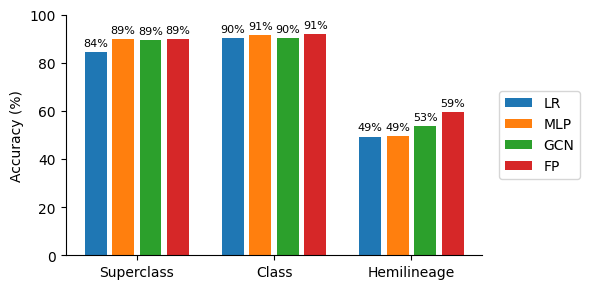

In [5]:
accuracies = {}
tasks = ["super_class", "class", "hemilineage"]
for model in results_both["model"].unique():
    sel_df = results_both[results_both["model"] == model].set_index("pred_target")
    accuracies[model.upper()] = list(sel_df.loc[tasks]["accuracy"])

x = np.arange(len(tasks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 1

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)

for attribute, measurement in accuracies.items():
    # print(attribute)
    # print(measurement)
    offset = width * multiplier
    # print(x )
    rects = ax.bar(
        x + offset, np.array(measurement) * 100, width * 0.8, label=attribute.upper()
    )
    ax.bar_label(rects, padding=3, fmt="%d%%", fontsize=8)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_xticks(x + width * 2.5, [x.replace("_", "").title() for x in tasks])
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
ax.set_ylim(0, 100)
sns.despine()

plt.savefig("../figs/accuracy_bar.pdf")
plt.show()

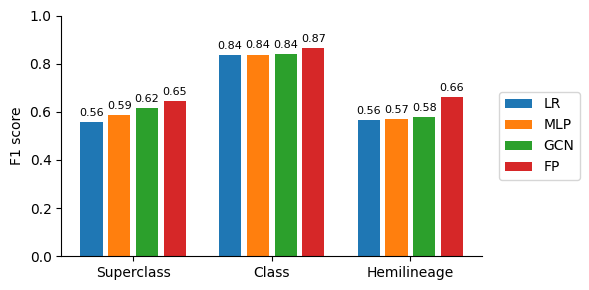

In [6]:
f1s = {}
for model in results_both["model"].unique():
    sel_df = results_both[results_both["model"] == model].set_index("pred_target")
    f1s[model.upper()] = list(sel_df.loc[tasks]["f1"])

x = np.arange(len(tasks))  # the label locations
width = 0.2  # the width of the bars
multiplier = 1

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)

for attribute, measurement in f1s.items():
    # print(attribute)
    # print(measurement)
    offset = width * multiplier
    # print(x )
    rects = ax.bar(
        x + offset, np.array(measurement), width * 0.8, label=attribute.upper()
    )
    ax.bar_label(rects, padding=3, fmt="%.2f", fontsize=8)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1 score')
ax.set_xticks(x + width * 2.5, [x.replace("_", "").title() for x in tasks])
ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
ax.set_ylim(0, 1)
sns.despine()

plt.savefig("../figs/f1_bar.pdf")
plt.show()

### Confusion Matrix for FP

In [7]:
pred_all = []
target_all = []
for inputs, targets in val_loader:
    outputs = mlp_model(inputs.to(device))
    preds = torch.argmax(outputs, dim=1)
    pred_all.append(preds.cpu().numpy())
    target_all.append(targets.numpy())
pred_all = np.concatenate(pred_all)
target_all = np.concatenate(target_all)

NameError: name 'val_loader' is not defined

In [ ]:
cmat = confusion_matrix(pred_all, target_all)
plt.imshow(np.log10(cmat))
# plt.imshow(cmat)
plt.colorbar(label="log(count)")
plt.xticks(
    range(len(class_id2name)),
    [class_id2name[i] for i in range(len(class_id2name))],
    rotation=90,
)
plt.yticks(
    range(len(class_id2name)),
    [class_id2name[i] for i in range(len(class_id2name))],
)
plt.title("Confusion matrix (log scale)")